In [1]:
%load_ext rpy2.ipython
# Turning on in-IPy R capabilities

In [2]:
%%R
library(phyloseq)
library(doParallel)
library(ggplot2)
library(vegan)
library(RColorBrewer)
library(plyr)
library(dplyr)
library(gridExtra)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: foreach

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: iterators

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: parallel

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: permut

In [3]:
%%R
#Creating the physeq object from our tree and biom table with taxonomic and metadata already included, telling it \
# that the taxonomy is from greengenes database, so it will recognize the samples
physeq = import_biom("../data/otu_table_tax_no211_meta.biom", treefilename = "../data/ssu-aln.bacteria.mask.tre",
                    parseFunction = parse_taxonomy_greengenes)

In [4]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
physeq_snorm = transform_sample_counts(physeq, function(x) x / sum(x))

In [5]:
%%R
# Set up computer to do parallel computing
registerDoParallel(cores=10)

# This is me running an ordination for a bunch of different sets (here, days), all at once
# I create a list of the variables I want to run the ordination by
days = list(Day1=0, Day12=1, Day82=2)

# Pull out the sample data from the physeq object
md = sample_data(physeq_snorm)

# Create a function that prunes samples where the Day is equal to the value from her list created above, for the physeq.
ord = function(x) {
    ps = prune_samples((md$Day == x), physeq_snorm)
# Then, on this pruned set of data for just one day, perform a weighted unifrac ordination
    NMDS = ordinate(ps,
                method = "NMDS",
                distance = "unifrac",
                weighted = TRUE,
                fast = TRUE,
                parallel = TRUE)
# Then do the plot_ordination command to get just the data frame, and report that, for the first 3 axes
    p.nmds = plot_ordination(ps, NMDS, axes = c(1,2), justDF = TRUE)
    p.nmds$Samples = rownames(p.nmds)
    return(p.nmds)
}

# With the function  created above, we then stick together (vertically), the results from the dataframe,
# using the days string as the input that gets run through the ord function each time.
# Now, you could make plots on each day separately, by using the facet_wrap parameter in ggplot,
# And the ordinations for each day would have been calculated independently, rather than across the whole experiment
ord.NMDS.days = ldply(days, ord)
ord.NMDS.days = ord.NMDS.days[,2:9]

Run 0 stress 0.1361207 
Run 1 stress 0.1679899 
Run 2 stress 0.1361206 
... New best solution
... Procrustes: rmse 7.1604e-05  max resid 0.0003580347 
... Similar to previous best
Run 3 stress 0.1361251 
... Procrustes: rmse 0.001195243  max resid 0.00631367 
... Similar to previous best
Run 4 stress 0.1375494 
Run 5 stress 0.136122 
... Procrustes: rmse 0.0003668744  max resid 0.001927184 
... Similar to previous best
Run 6 stress 0.1361211 
... Procrustes: rmse 0.0001629739  max resid 0.0008562315 
... Similar to previous best
Run 7 stress 0.1375498 
Run 8 stress 0.1650894 
Run 9 stress 0.1375506 
Run 10 stress 0.1361203 
... New best solution
... Procrustes: rmse 0.0002157304  max resid 0.001129135 
... Similar to previous best
Run 11 stress 0.1375526 
Run 12 stress 0.1361203 
... Procrustes: rmse 2.973774e-06  max resid 1.409951e-05 
... Similar to previous best
Run 13 stress 0.1375506 
Run 14 stress 0.2115361 
Run 15 stress 0.1375491 
Run 16 stress 0.1361206 
... Procrustes: rmse 

In [6]:
%%R
# Set up computer to do parallel computing
registerDoParallel(cores=10)

# This is me running an ordination for a bunch of different sets (here, amendments), all at once
# I create a list of the variables I want to run the ordination by
amdmts = list(Soil=0, PyOM=1, Stover=2)

# Pull out the sample data from the physeq object
md = sample_data(physeq_snorm)

# Create a function that prunes samples where the Day is equal to the value from her list created above, for the physeq.
ord = function(x) {
    ps = prune_samples((md$Amdmt == x), physeq_snorm)
# Then, on this pruned set of data for just one day, perform a weighted unifrac ordination
    NMDS = ordinate(ps,
                method = "NMDS",
                distance = "unifrac",
                weighted = TRUE,
                fast = TRUE,
                parallel = TRUE)
# Then do the plot_ordination command to get just the data frame, and report that, for the first 3 axes
    p.nmds = plot_ordination(ps, NMDS, axes = c(1,2), justDF = TRUE)
    p.nmds$Samples = rownames(p.nmds)
    return(p.nmds)
}

# With the function  created above, we then stick together (vertically), the results from the dataframe,
# using the days string as the input that gets run through the ord function each time.
# Now, you could make plots on each day separately, by using the facet_wrap parameter in ggplot,
# And the ordinations for each day would have been calculated independently, rather than across the whole experiment
ord.NMDS.amdmts = ldply(amdmts, ord)
ord.NMDS.amdmts = ord.NMDS.amdmts[,2:9]

Run 0 stress 0.1520164 
Run 1 stress 0.1520306 
... Procrustes: rmse 0.003000295  max resid 0.01538887 
Run 2 stress 0.1520214 
... Procrustes: rmse 0.0009259461  max resid 0.004729152 
... Similar to previous best
Run 3 stress 0.1520366 
... Procrustes: rmse 0.003451884  max resid 0.01578416 
Run 4 stress 0.1520229 
... Procrustes: rmse 0.001099378  max resid 0.005807711 
... Similar to previous best
Run 5 stress 0.1520191 
... Procrustes: rmse 0.001155295  max resid 0.006097631 
... Similar to previous best
Run 6 stress 0.1520216 
... Procrustes: rmse 0.0009412774  max resid 0.004922679 
... Similar to previous best
Run 7 stress 0.1520246 
... Procrustes: rmse 0.001196755  max resid 0.006241127 
... Similar to previous best
Run 8 stress 0.1520232 
... Procrustes: rmse 0.001039884  max resid 0.005387654 
... Similar to previous best
Run 9 stress 0.1520177 
... Procrustes: rmse 0.001018764  max resid 0.005299825 
... Similar to previous best
Run 10 stress 0.1520178 
... Procrustes: rms

In [7]:
%%R
# Computing the weighted unifrac distance matrix and NMDS in parallel
registerDoParallel(cores=10)
ord.NMDS.full = ordinate(physeq_snorm, method = "NMDS", distance = "unifrac", weighted = TRUE, fast = TRUE, parallel = TRUE)
NMDS.full = plot_ordination(physeq_snorm, ord.NMDS.full, axes = c(1,2), justDF = TRUE)
NMDS.full$Samples = rownames(NMDS.full)

Run 0 stress 0.08149105 
Run 1 stress 0.08141088 
... New best solution
... Procrustes: rmse 0.005273043  max resid 0.03771178 
Run 2 stress 0.08195361 
Run 3 stress 0.08463203 
Run 4 stress 0.08642421 
Run 5 stress 0.08472512 
Run 6 stress 0.08535818 
Run 7 stress 0.08368845 
Run 8 stress 0.08828467 
Run 9 stress 0.0835365 
Run 10 stress 0.08527381 
Run 11 stress 0.08602284 
Run 12 stress 0.0823728 
Run 13 stress 0.08429363 
Run 14 stress 0.08647064 
Run 15 stress 0.08276144 
Run 16 stress 0.0814003 
... New best solution
... Procrustes: rmse 0.00209317  max resid 0.01055676 
Run 17 stress 0.08523645 
Run 18 stress 0.08448979 
Run 19 stress 0.08813209 
Run 20 stress 0.08829728 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


In [8]:
%%R
simple <- ord.NMDS.days
full <- NMDS.full
simple$ord <- "By day"
full$ord <- "Full"
NMDS.days<-rbind(simple, full)
head(NMDS.days)

        NMDS1        NMDS2 Plants DayAmdmt Amdmt ID Day Samples    ord
1 -0.01289812 -0.024912990      1       01     1  D   0    S009 By day
2  0.01785060 -0.025391644      0       00     0  A   0    S026 By day
3 -0.01978674 -0.033394052      1       00     0  C   0    S023 By day
4 -0.02227281  0.002296966      0       01     1  B   0    S012 By day
5 -0.09197613  0.048473981      0       00     0  A   0    S031 By day
6 -0.03172601  0.004555991      1       00     0  C   0    S013 By day


In [9]:
%%R
simple <- ord.NMDS.amdmts
full <- NMDS.full
simple$ord <- "By amendment"
full$ord <- "Full"
NMDS.amdmts<-rbind(simple, full)
dim(NMDS.amdmts)

[1] 238   9


In [16]:
%%R
D <- NMDS.days
D = D[D$Day==2,]
D = D[D$ord=="By day",]
D = D[D$ID %in% c("A","B","F"),]
# Getting sample and then collecting
D = D %>%
    group_by(ID)%>%
    sample_n(4)
SampleIDs = D$Samples
SampleIDs

 [1] "S221" "S226" "S216" "S231" "S202" "S237" "S207" "S217" "S243" "S247"
[11] "S242" "S246"


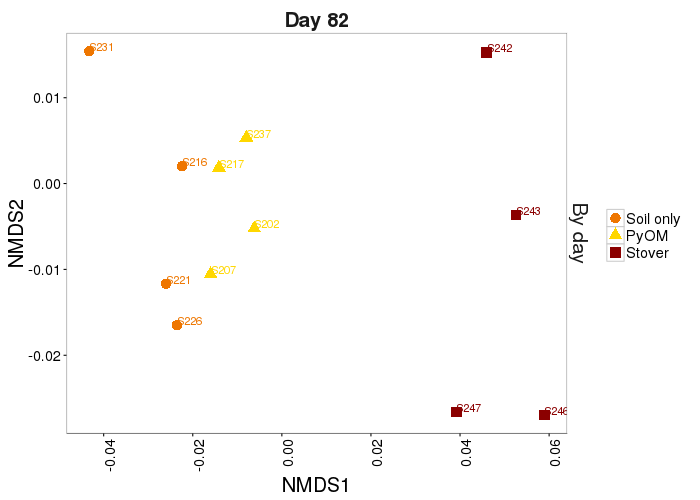

In [17]:
%%R -h 500 -w 700

colnames(D)[1:2]<-c("NMDS1","NMDS2")
# Renames the axis columns

D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
D$ord = factor(D$ord, levels=c("Full", "By day"))
D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))
D$Strip2 = paste(D$ord)



# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = AmdmtName, shape = AmdmtName))

# Determines the size of the symbols
p = p  + geom_point(size=4.5) + scale_colour_manual(values=c("darkorange2","gold","darkred"))
p = p + geom_text(aes(label=Samples),hjust=0, vjust=0)
p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),
          strip.background = element_rect(colour="white", fill="white"))

p = p + theme(strip.text.x = element_text(size = 20),
              strip.text.y = element_text(size = 20),
              axis.text.x = element_text(size = 15, angle = 90, hjust = 1, vjust = 1),
              axis.title.x = element_text(size = 20),
              axis.text.y = element_text(size=15),
              axis.title.y = element_text(size = 20),
              legend.title = element_blank(),
              legend.text = element_text(size = 15))

# Displays the plot object
p = p + facet_grid(~Strip2~DayName, scales = "free")
# The axis scales could be all optimized individually
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Amendments
plot.days = p
p

## First time I ran this, I got samples 231, 216, 221, 226, 237, 217, 202, 207, 242, 243, 247, 246
### So, we will submit these to JGI.